# Impact of Trumps Tweets
### by: Ginue(Justin) Han and Leo Crabbe


## Research Questions
Donald Trump’s Twitter presence was one of the key factors in his 2016 presidential campaign, and remains one of the most infamous facets of his presidency. This project will analyse his Twitter output to find potential patterns in the way he posts on the website.
1. What are the top 20 words he uses in his tweets?
We are trying to compute the most words he uses excluding words like “I”, “the”, etc. We want to see if the words he uses have positive or negative meanings. 
2. Is there a correlation between his tweets and approval rating?
We are trying to compute a correlation between his tweets and approval rating. We want to see if his controversial tweets affect his approval rating
3. When does he tweet the most?
We are trying to find a correlation between the time of day and how likely Trump is to tweet.
4. How often does he use superlatives?
We are trying to compute how frequently he uses words like “best”, “greatest”, etc, and whether his use of them has changed over time. More specifically did he begin using them more during his bid for the presidency?
5. What tweets have the most reach?
We are trying to compute what tweets have the most reach based on the number of retweets they have, and seeing if there’s a correlation between the impact of the tweet and it’s length/sentence structure. 

## Motivation and Background

In this age, social media plays a huge role in getting information to people in a fast and easy way as well as communicating your thoughts. Many popular people use social media and attract millions of followers who want to keep up to date on what they are doing and saying which can have a major impact on their followers and their image depending on what they say. President Trump is one of the first presidents of the USA to utilize social media(Twitter) to this extent sending out several tweets almost everyday garnering thousands of comments, retweets, and likes. Some of these tweets are considered to be incredibly controversial with his comments on his opposition, the wall, etc. His tweets have a major influence on his followers and we want to see what topics he tweets about, what tweets are the most controversial, correlation between his tweets and approval rating, and crime rates. It is important to track his tweets because of his views that tend to misinform and incite hate among his followers. By tracking what he tweets and what has the greatest impact can help us pinpoint what issues are seemingly most important and controversial in America as well as seeing if his tweets are causing a greater divide. 

## Dataset

For the Trump approval ratings data, the data was collected through polls and compiled together in a csv document. It includes the dates the polls were taken from 2017 to 2019, the high and low ratings for approval and disapproval, and then the averages for approval and disapproval. 
https://github.com/fivethirtyeight/data/tree/master/trump-approval-ratings

Here is a .csv file of Donald Trump’s tweets, complete with time of posting and amount of likes/retweets.
https://raw.githubusercontent.com/sashaperigo/Trump-Tweets/master/data.csv

## Methodology

For this project, while each question has its own individual approach, there is a general process that connects them. For the first three questions we are going to be analyzing individual Tweets and comparing them with some variable that differs between the three questions. For the first question we want to analyze the individual words of each tweet by turning every tweet into a list or dictionary and keeping count of how many times individual words appear. With this information we want to see the type of connotation that are associated with each word.For question Two we want to see if there is a correlation with between Trump’s tweet and the nations perception of him using presidential approval ratings. We want to compare the general time frame of a tweet and see if there is a significant change in his approval rating. For the third question we want to see when he is most likely to tweet by extracting the time a tweet was published and keeping track how often a tweet is likely to occur at a given time. For this one we are trying to see if there is a range of times, say between 2am-3am, when he is most likely to post on his social media. For this question we are not analyzing the content of the tweets themselves but rather the time when one could expect a tweet to most likely occur.
    
Question Four has the same general process of question one with the except that we will only be looking for certain words to appear rather than seeing how many times different words appear. We will make a dictionary or list (unsure at this time) with certain keywords already included and using function to count the number of times those words have appeared in his tweets similar to question one. The difference we want to observe between this question and question is one whether there has been a change in usage over time. We want to compare his usage of these words with his time in the presidency to see if the frequency of their usage has increased or decreased with time. Question 5 explores the possibility of the structure/length of a tweet influencing the overall reach of his tweets. We want to see if there is a correlation between how many characters his tweets contain and how many people interact with his tweet by “liking” the tweet. For this question we have considered the possibility of no correlation existing. Question Six will be approached by making a graph of the general trend in hate crimes across a few years. We will examine the overall numbers of hate crimes perpetrated as stated by the FBI for several years under 2 different presidencies. For this question we are aware that the general trend for hate crimes has been increasing over the years, likely due to an increasing and diversifying population, we want to see if there is a larger increase than what should be expected under Trump’s presidency. To do this we will create two graphs using the statistics for Obama’s presidency (or some other president or more than one president)  and one for Trump’s presidency and then compare the slope of the graphs with each other. This question represents a unique challenge because although the FBI database goes back several presidents, the newest report for 2018 or 2019 are not yet available for Trump so we only have 2 possible data points so far which greatly sway the slope of a graph compared to other presidents. A possible solution that we are considering is using only the first two years of two different presidents and comparing those to Trump’s first two years as president. 

## Workplan

This project is comprised of 6 smaller questions rather than one big one, so we will be assigning 2 questions to each member of the group.

The work for each question will involve a few common steps:
1. __Extract the data:__ The main file we will be using is a large .csv file containing all Trump’s tweets paired with data on how they were received on Twitter. Some of our questions require only the tweets’ contents, some require contents in addition to number of retweets, favourites, etc. Therefore we’ll have to extract a different set of strings for each question using file IO commands.

2. __Analyse the data:__ In the case of question 1, for example, this will involve creating a dictionary containing every word in the tweets (as keys) paired with the number of times they are used, and then iteratively appending the top 20 words to a list. A similar dictionary method will be used for question 3, but with times of the day and number of tweets as the pairing. For question 4 words ending in -est will be extracted and counted, and again the most common ones will be appended to a list (the words will have to be combed through to avoid outlier non-superlatives like ‘guest’ and also to include words like ‘least’ which don’t end in -est. The other 3 questions are correlation questions, each testing whether there’s a correlation between 2 variables. In each case a scatterplot of them will be plotted, and the Pearson coefficient for the plot will be calculated.

3.  __Interpret the data:__ In the case of the correlation questions, this means interpreting the coefficient to conclude whether a correlation exists, and in the case of the other questions this means looking at the trends and offering a hypothesis as to why they exist.  

4.  __Presenting the data:__ After the relevant data is gathered and conclusions have been drawn the data/conclusions should be presented in an easy to read fashion in a Jupyter Notebook/PDF file. Each individual will format their own questions’ section in the report.Throughout this assignment we will be consulting each other about our respective questions if we encounter problems. We have a shared Google Doc where we’ll be able to paste and edit each-other’s code. We won’t be pair coding as we will each have 2 questions to work on independently, though if we do find ours difficult we’ll meet and work on it together.


In [2]:
import csv
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime as dt
import pandas as pd

In [15]:
def approval_ratings(file):
    open_file = open(file)
    csv_file = csv.reader(open_file)
    #stores indexes of columns you want values from
    approval_column_index = 0
    #stores values from desired columns
    approval_values=[]
    #loop through the rows in the csv file
    for row in csv_file:
        #if the indexes var is empty, loop through the elements in the row and 
        #if its == approve/disapprove_estimate, then add the index number to 
        #the approvae/disapprove index var.
        if approval_column_index == 0:
            for i in range(len(row)):
                if "approve_estimate" == row[i]:
                    approval_column_index = i
        else:
            approval_values.append(float(row[approval_column_index]))
    return list(reversed(approval_values))
    

def date(file):
    open_file = open(file)
    csv_file = csv.reader(open_file)
    #stores indexes of columns you want values from
    first_col = True
    #stores values from desired columns
    dates=[]
    #loop through the rows in the csv file
    for row in csv_file:
        if first_col == True:
            first_col = False
        else:
            if "/" in row[2][0:2]:
                dates.append(row[2][0])
            else:
                dates.append(row[2][0:2])
            dates[len(dates)-1] += row[2][-5:]
    return list(reversed(dates))

dates_list = date("data/trump_approval/approval_topline.csv")
ratings_list = approval_ratings("data/trump_approval/approval_topline.csv")

def average_per_month(ratings, dates):
    ratings_per_month = {}
    counter = {}
    for i in range(len(dates)):
        if dates[i] not in ratings_per_month.keys():
            ratings_per_month[dates[i]] = ratings[i]
            counter[dates[i]] = 1
        else:
            ratings_per_month[dates[i]] += ratings[i]
            counter[dates[i]] += 1
    for key in ratings_per_month.keys():
        ratings_per_month[key] = ratings_per_month[key]/counter[key]
    return ratings_per_month
    
approval_ratings_data = average_per_month(ratings_list, dates_list)

    

FileNotFoundError: [Errno 2] No such file or directory: 'data/trump_approval/approval_topline.csv'

In [19]:
def favorite_count(file,d='\t'):
    open_file = open(file,'r', encoding='utf8', errors='ignore')
    csv_file = csv.reader(open_file)
    favorite_column_index = 0
    #stores values from desired columns
    favorite_values=[]
    #loop through the rows in the csv file
    for row in csv_file:
        #if the indexes var is empty, loop through the elements in the row and 
        #if its == approve/disapprove_estimate, then add the index number to 
        #the approvae/disapprove index var.
        if favorite_column_index == 0:
            for i in range(len(row)):
                if "favorite_count" == row[i]:
                    favorite_column_index = i
        else:
            favorite_values.append(int(row[favorite_column_index]))
    return list(reversed(favorite_values))

favorite_count("data/trump_approval/tweets.csv")

def tweet_date(file):
    open_file = open(file,'r', encoding='utf8', errors='ignore')
    csv_file = csv.reader(open_file)
    #stores indexes of columns you want values from
    first_col = True
    #stores values from desired columns
    dates=[]
    #loop through the rows in the csv file
    for row in csv_file:
        if first_col == True:
            first_col = False
        else:
            dates.append(row[3])
            dates[len(dates)-1] += "/"
            dates[len(dates)-1] += row[4]
    return list(reversed(dates))

dates_tweet_list = tweet_date("data/trump_approval/tweets.csv")
favorites_tweet_list = favorite_count("data/trump_approval/tweets.csv")
tweet_favorite_data = average_per_month(favorites_tweet_list, dates_tweet_list)


FileNotFoundError: [Errno 2] No such file or directory: 'data/trump_approval/tweets.csv'

In [18]:
def two_line_plot(dict1, dict2):
    '''Creates two different lines graphs that share the same x axis but have 
    different y axis. takes in dict1 and dict2 as parameters and use them to
    plot the lines. '''
    fig, ax1 = plt.subplots()
    color = 'tab:red'
    #sets x and y label. color= sets color of y label
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Average Approval Rating", color=color)
    #plot dict1.keys() as x axis and dict1.values() as line. sets color of line
    ax1.plot(dict1.keys(),dict1.values(), color=color)
    #rotates x tick labels
    plt.xticks(rotation=90)
    #colors the ax1 label
    ax1.tick_params(axis='y', labelcolor=color)
    #create a 2nd axes that shares same x axis as ax1
    ax2 = ax1.twinx()
    color2 = 'tab:blue'
    #sets ylabel name and color
    ax2.set_ylabel("Average Tweet Favorites", color=color2)
    #plots dict2
    ax2.plot(dict2.values(), color=color2)
    #colors ylabel
    ax2.tick_params(axis='y', labelcolor=color2)
    plt.show()
    


In [25]:
############LEO CODE#########################

def read_csv(path):
    """Reads the CSV file at path, and returns a list of rows from the file.

    Parameters:
        path: path to a CSV file. 

    Returns:
        list of dictionaries: Each dictionary maps the columns of the CSV file
        to the values found in one row of the CSV file. Although this function 
        will work for any csv file, for our purposes, depending on the contents
        of the CSV file, this will typically be a list of *ElectionDataRow*s or
        a list of *PollDataRow*s (or a list of electoral college data rows).
    """
    output = []
    csv_file = open(path)
    for row in csv.DictReader(csv_file):
        output.append(row)
    csv_file.close()    
    return output

allwords = []
for line in read_csv('data.csv'):
    for word in line['Text'].split():
        allwords.append(word)


# If i don't adjust for common words, the top most commonly used words would all be prepositions or verbs like "do"
# so I downloaded a text file of the 10000 most commonly used english words and add an if statement that ensures
# that if a word in a tweet belongs tho this list of words it won't be counted

common_words = []

myFile = open("commonwords.txt")
for line in myFile:
    word = str(line)
    word = word.replace("\n","")
    common_words.append(word)
myFile.close()    


words = []

for word in allwords:
    word = word.replace(".", "") # we dont want the code to count "thanks" and "thanks." separately
    word = word.replace("!", "") # or "thanks!" and "thanks"
    word = word.replace('"', "") # or " thanks" " and " thanks "
    if word.lower() == word:
          pass
    elif word.lower() in common_words:
        pass
    elif word[0] == "@":         # we don't want to consider twitter mentions (eg @HillaryClinton)
        pass
    else:
        words.append(word.lower())

counts = {}         
for i in words:           # this iterates through the words and counts how many times they appear in the list
    if i in counts:
        counts[i] += 1
    else:
        counts[i] = 1

# here i make new dictiorary that is just counts{} but with the keys and values switched 
# i do this because it's easier for sort the keys in increasing order here
        
nucounts = {}      
for i in counts:
    nucounts[counts[i]] = i

def common_words(dictionary):
    for j in range(-20,0):           
        i = sorted(dictionary)[j]
        print(dictionary[i], "was said", i , "times")



# for extraction of superlatives the method if almost the same as the common words one

# the qualifier i'm using for superlatives is that their last 3 letters are "est" (with the exception of "worst")
# this isn't perfect as there are a lot of words ending in 'est' that aren't superlatives but we'll just
# have to ignore them

superlatives = []
for word in allwords:
    if len(word) > 2:
        if (word[-3], word[-2], word[-1]) == ("e","s","t"):  
            superlatives.append(word.lower())
        elif word == "worst":
            superlatives.append(word.lower())
        else:
            pass
    else:
        pass

supercounts = {}
for i in superlatives:
    if i in supercounts:
        supercounts[i] += 1
    else:
        supercounts[i] = 1

nuucounts = {}
for i in supercounts:
    nuucounts[supercounts[i]] = i

def superlatives(dictionary):
    
    for j in range(-20,0):
        i = sorted(dictionary)[j]
        print(dictionary[i], "was said", i , "times")


    
times = {}
for line in read_csv('data.csv'):
    hour = line['Date'][-8] + line['Date'][-7]
    if hour in times:
        times[hour] += 1
    else:
        times[hour] = 1

    
sort_times = {}
for i in sorted(times):
    sort_times[i] = times[i]
    


# Generate a normal distribution, center at x=0 and y=5
frequency = list(sort_times.keys())
time_of_day = list(sort_times.values())

def histogram_plot(x,y):
    fig, ax = plt.subplots()

    ax.set_xlabel('Time of Day')
    ax.set_ylabel('Frequency')
    ax.set_title(r'Histogram of times of day that Trump tweets')


    ax.bar(x, y, width= 0.8, align= 'edge')



## Results

#### Question 1: 

"I", "Donald", and "Trump" were all in the top 4 most common words in the president's tweets. Given what some would call his egotistical persona this result is perhaps unsurprising. Also included were "Obama", "China", "Hillary", "Obamacare", "#makeamericagreatagain" and "#trump2016". These were of course all buzzwords and catchphrases from his 2016 election campaign. Interestingly "#celebapprentice" and "apprentice" show up, meaning Trump has tweeted about his reality show more times than the "wall" or any one politician except Obama/Hillary ("Ted" or "Cruz", for example, are absent from the list).

#### Question 2:



#### Question 3:

There is a definite peak in Trump's tweeting between 2 and 5pm. What's surprising is that there's a sharp drop after that, and then a steady increase in tweeting frequency until 11pm, where there is a smaller drop. One could assume this is often Trump's bedtime. A hypothesis for explaining the 2-5 peak is perhaps that this is the time of day when the Trump typically has some downtime, and therefore can tweet freely.

#### Question 4:

#### Question 5:




congratulations was said 228 times
not was said 248 times
#celebapprentice was said 284 times
american was said 311 times
obamacare was said 313 times
apprentice was said 341 times
china was said 395 times
hillary was said 417 times
#makeamericagreatagain was said 435 times
i'm was said 501 times
via was said 529 times
mr was said 580 times
#trump2016 was said 668 times
president was said 787 times
america was said 980 times
obama was said 1083 times
donald was said 1395 times
thanks was said 1671 times
trump was said 3546 times
i was said 5857 times

coldest was said 9 times
request was said 11 times
lowest was said 13 times
test was said 17 times
smartest was said 18 times
finest was said 21 times
dumbest was said 23 times
largest was said 26 times
latest was said 34 times
honest was said 37 times
rest was said 38 times
interest was said 39 times
guest was said 40 times
dishonest was said 59 times
highest was said 63 times
west was said 66 times
biggest was said 96 times
worst was sa

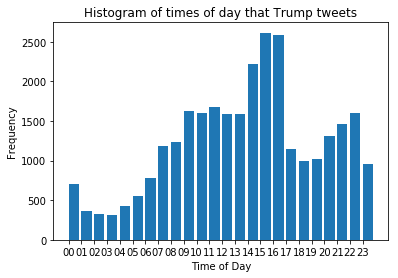

In [29]:

common_words(nucounts)

print()


#two_line_plot(approval_ratings_data, tweet_favorite_data)



histogram_plot(frequency, time_of_day)



superlatives(nuucounts)
print()



## Work Plan Evaluation

## Testing

## Collaboration
Our partner Jose Campos dropped the class so only the two of us worked on this project. 

README.md*       commonwords.txt* data.csv*        trump_tweets.py*
